In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]
from matplotlib.ticker import MultipleLocator

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');

default_params   = {'ExternalObservableFile': 'Rvalues_200815.csv',
                    'ExternalObservableInfo': {'dateformat':'%d/%m/%Y'},
                    'resolve_US_states': True,
                    'FinalDate': '18/05/2020',
                    'FinalDateExtendWithShiftdays':True}


In [ ]:
# loading via pickle below
cv_cccsl     = cvc.CrossValidation(datasource = 'CCCSL',     **default_params)
cv_oxford    = cvc.CrossValidation(datasource = 'OXFORD',    **default_params)
cv_whophsm   = cvc.CrossValidation(datasource = 'WHOPHSM',   **default_params)
cv_acaps     = cvc.CrossValidation(datasource = 'ACAPS',     **default_params)
cv_coronanet = cvc.CrossValidation(datasource = 'CORONANET', **default_params)
cv_hitcovid  = cvc.CrossValidation(datasource = 'HITCOVID',  **default_params)

In [ ]:
# This takes a LONG time!

shiftdaylist = np.arange(8)+10
alphalist    = np.power(10,np.linspace(-4,-1,num=17))


for i in range(20):
    print('CCCSL')
    cv_cccsl.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('OXFORD')
    cv_oxford.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('WHOPHSM')
    cv_whophsm.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('ACAPS')
    cv_acaps.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('CORONANET')
    cv_coronanet.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('HITCOVID')
    cv_hitcovid.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)



In [2]:
# ... rather load from external files

cv_cccsl     = pickle.load(open('pickle/finalCV_CCCSL_200904.pickle','rb'))
cv_coronanet = pickle.load(open('pickle/finalCV_CORONANET_200904.pickle','rb'))
cv_whophsm   = pickle.load(open('pickle/finalCV_WHOPHSM_200904.pickle','rb'))

cv_oxford    = pickle.load(open('pickle/finalCV_OXFORD_200904.pickle','rb'))
cv_acaps     = pickle.load(open('pickle/finalCV_ACAPS_200904.pickle','rb'))
cv_hitcovid  = pickle.load(open('pickle/finalCV_HITCOVID_200904.pickle','rb'))


/home/lukas/projects/corona/programs/measureclass.py:381: UserWarning: Database "ACAPS" does not support US state resolution
  warnings.warn('Database "ACAPS" does not support US state resolution')


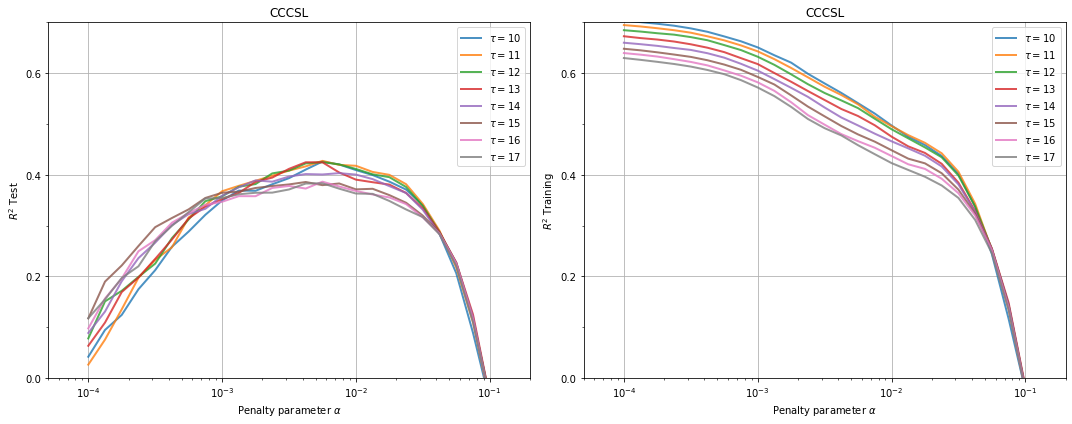

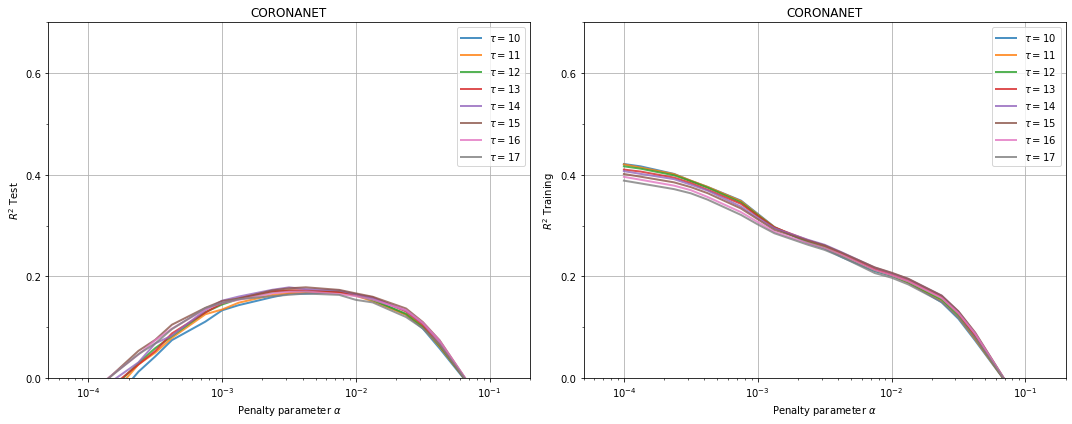

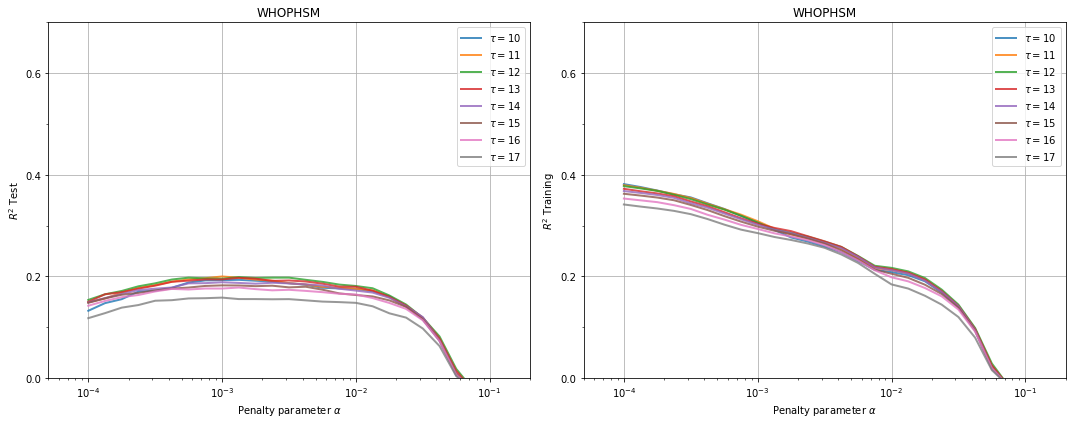

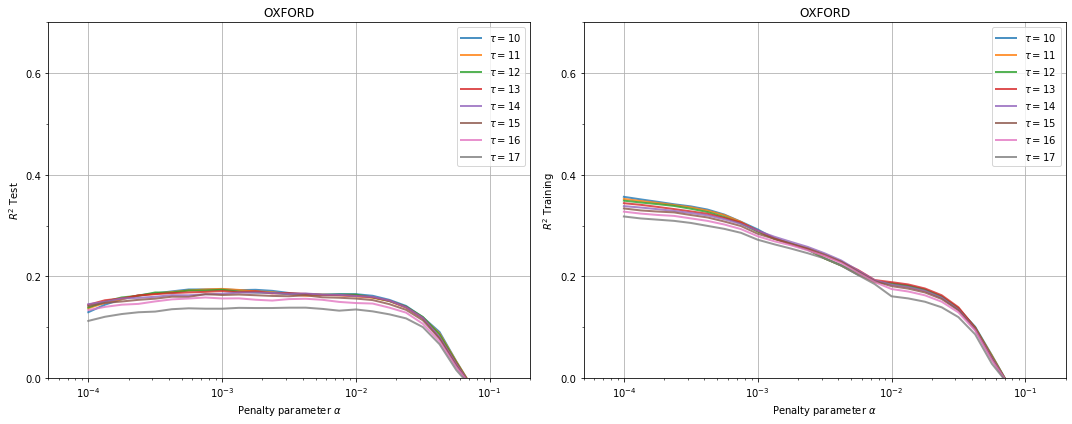

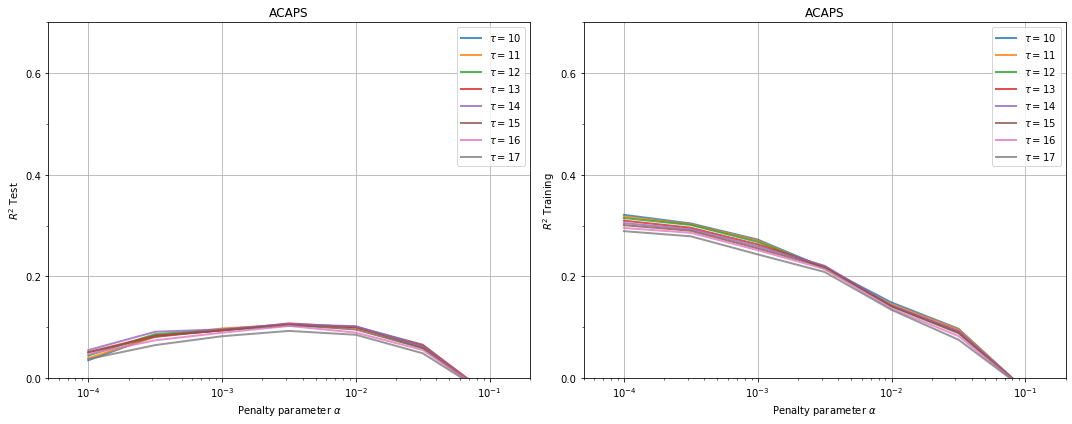

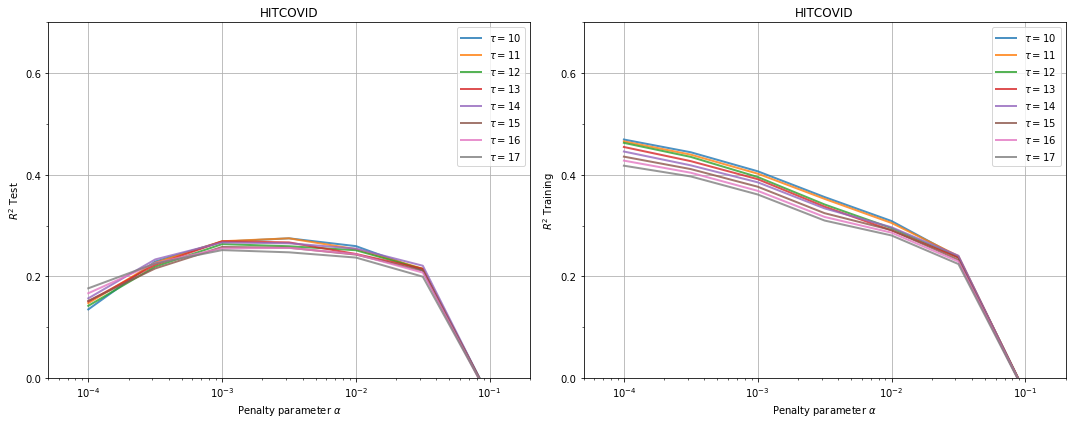

In [3]:
cv_cccsl.PlotCVresults    (title = 'CCCSL',     ylim = (0,.7), filename = 'lasso_crossvalidation_cccsl_200907.pdf',     xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_coronanet.PlotCVresults(title = 'CORONANET', ylim = (0,.7), filename = 'lasso_crossvalidation_coronanet_200907.pdf', xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_whophsm.PlotCVresults  (title = 'WHOPHSM',   ylim = (0,.7), filename = 'lasso_crossvalidation_whophsm_200907.pdf',   xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)

cv_oxford.PlotCVresults   (title = 'OXFORD',    ylim = (0,.7), filename = 'lasso_crossvalidation_oxford_200907.pdf',    xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_acaps.PlotCVresults    (title = 'ACAPS',     ylim = (0,.7), filename = 'lasso_crossvalidation_acaps_200907.pdf',     xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_hitcovid.PlotCVresults (title = 'HITCOVID',  ylim = (0,.7), filename = 'lasso_crossvalidation_hitcovid_200907.pdf',  xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)


In [4]:
print('\nCCCSL\n',cv_cccsl.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nCORONANET\n',cv_coronanet.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nWHOPHSM\n',cv_whophsm.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))

print('\n')
print('\nOXFORD\n',cv_oxford.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nACAPS\n',cv_acaps.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nHITCOVID\n',cv_hitcovid.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))



CCCSL
     shiftdays     alpha  R2 Test Weighted  R2 Test Avgd
45         11  0.005623          0.427417      0.421054
20         10  0.005623          0.426094      0.412925
70         12  0.005623          0.424836      0.418101
92         13  0.004217          0.424682      0.415904
95         13  0.005623          0.424591      0.410276
67         12  0.004217          0.422431      0.414038
73         12  0.007499          0.420541      0.413472
23         10  0.007499          0.420313      0.409134
48         11  0.007499          0.419495      0.413676
26         11  0.010000          0.417759      0.411833

CORONANET
      shiftdays     alpha  R2 Test Weighted  R2 Test Avgd
109         15  0.004217          0.178562      0.197943
87          14  0.003162          0.178398      0.197200
106         15  0.003162          0.176545      0.194712
90          14  0.004217          0.175016      0.196015
84          14  0.002371          0.173639      0.191016
112         15  0.0074

In [ ]:
# already contained in pickle file!
cv_cccsl.ComputeFinalModels(modelparameters=[(11,0.005623)])
cv_oxford.ComputeFinalModels(modelparameters=[(11,0.001000)])
cv_whophsm.ComputeFinalModels(modelparameters=[(11,0.001000)])
cv_acaps.ComputeFinalModels(modelparameters=[(13,0.003162)])
cv_coronanet.ComputeFinalModels(modelparameters=[(14,0.003162)])
cv_hitcovid.ComputeFinalModels(modelparameters=[(10,0.003162)])

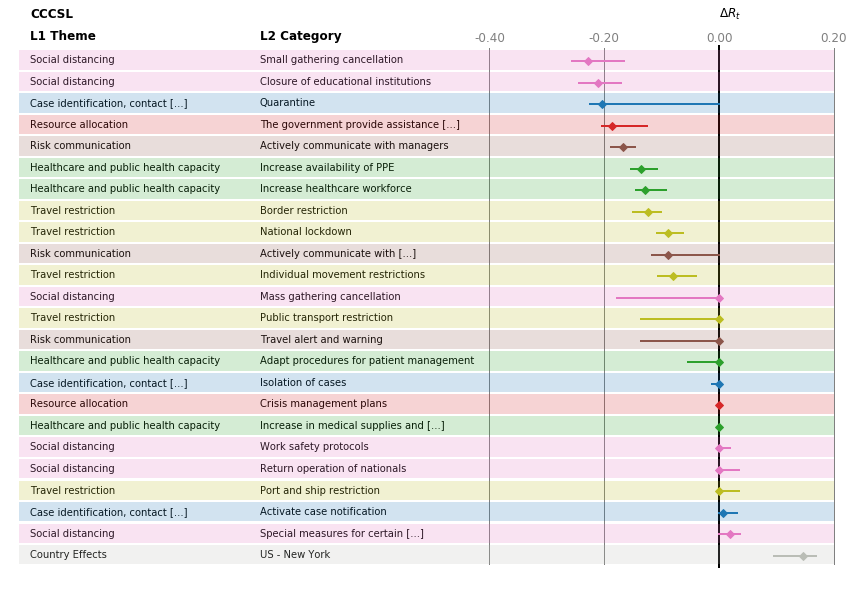

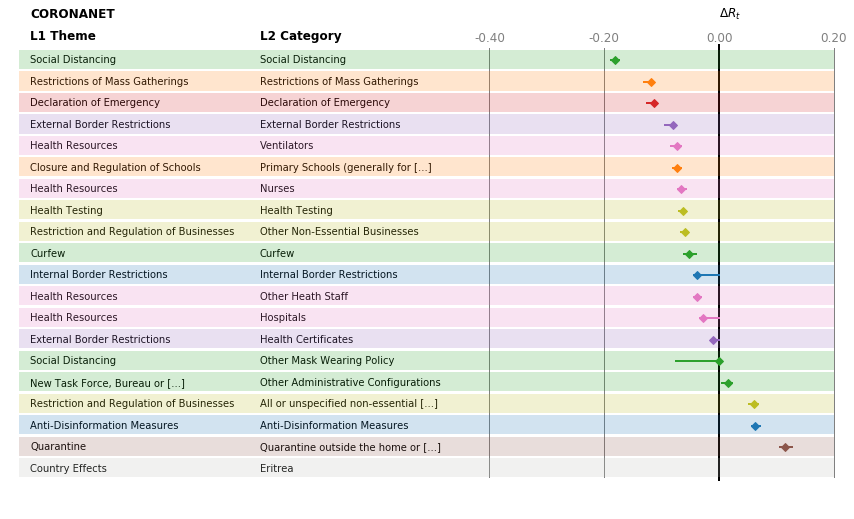

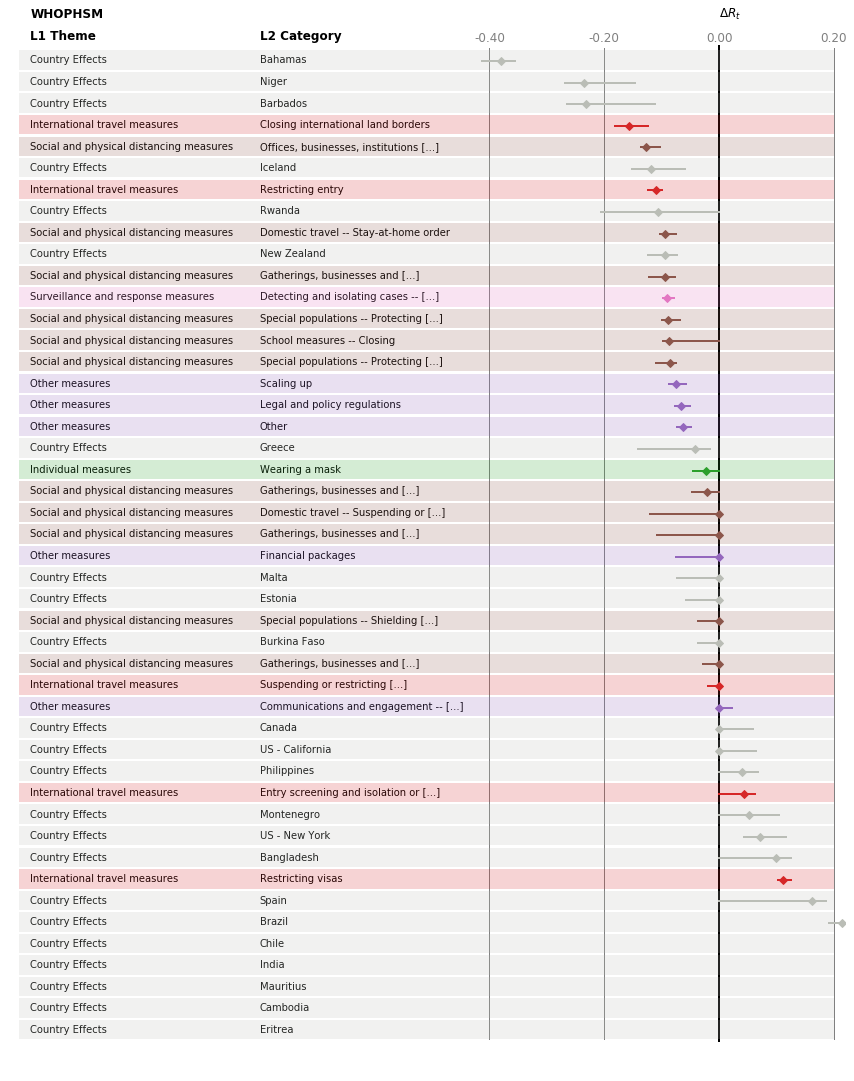

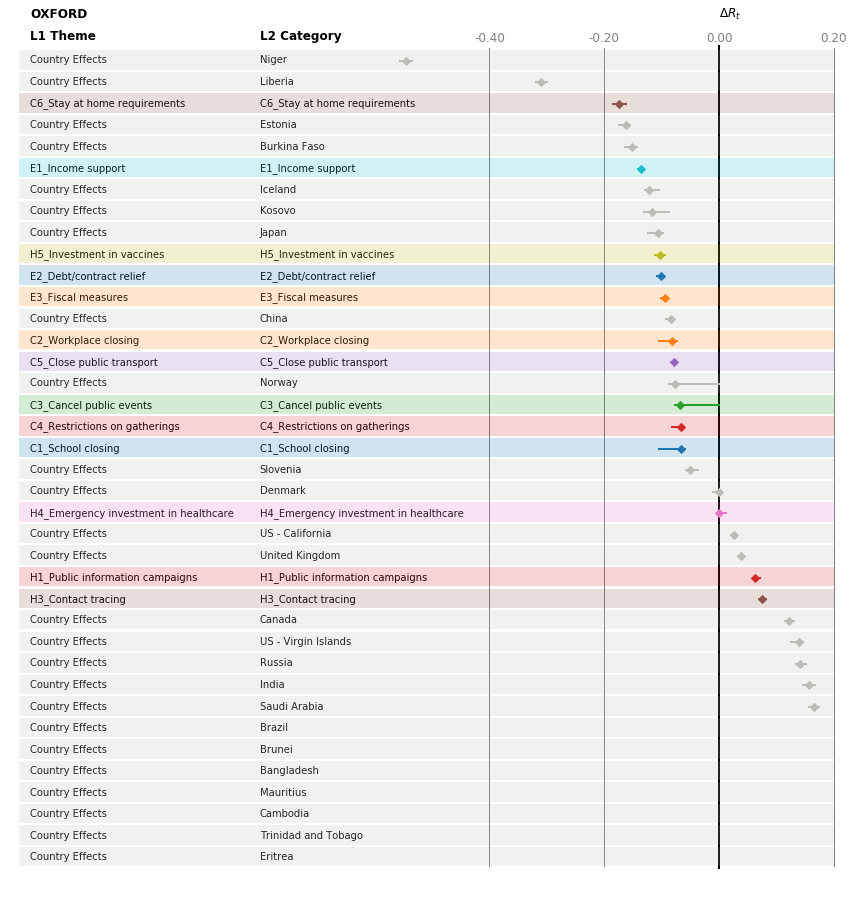

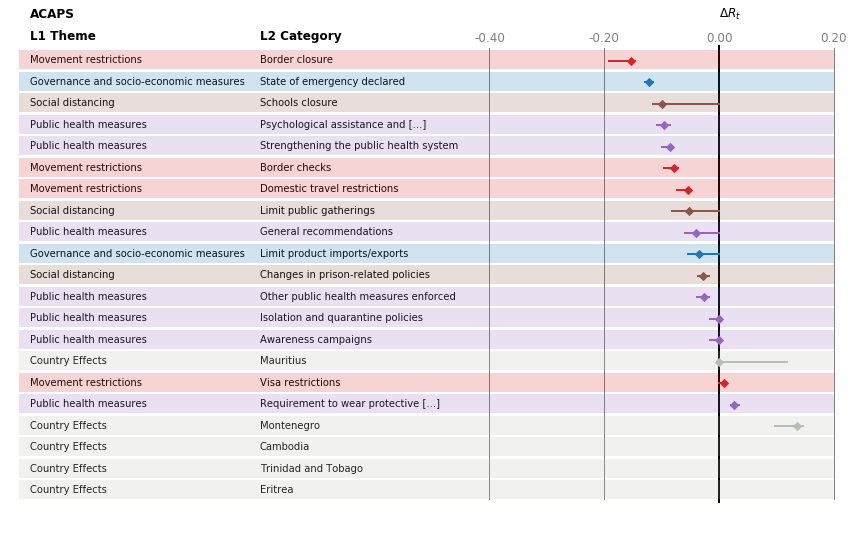

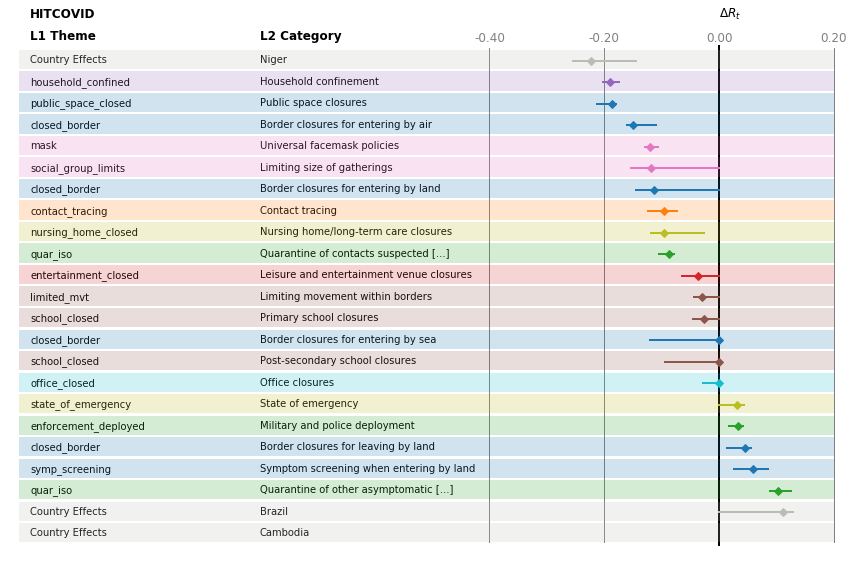

In [5]:
cv_cccsl.PlotMeasureListSorted    (title = 'CCCSL',     drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_cccsl_200907.pdf',     graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_coronanet.PlotMeasureListSorted(title = 'CORONANET', drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_coronanet_200907.pdf', graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_whophsm.PlotMeasureListSorted  (title = 'WHOPHSM',   drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_whophsm_200907.pdf',   graylines = [-40,-20,20], include_countries = True, figsize = (12,3))

cv_oxford.PlotMeasureListSorted   (title = 'OXFORD',    drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_oxford_200907.pdf',    graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_acaps.PlotMeasureListSorted    (title = 'ACAPS',     drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_acaps_200907.pdf',     graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_hitcovid.PlotMeasureListSorted (title = 'HITCOVID',  drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_hitcovid_200907.pdf',  graylines = [-40,-20,20], include_countries = True, figsize = (12,3))


In [7]:
cv_cccsl.FinalMeasureEffects    (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_cccsl_200907.csv')
cv_coronanet.FinalMeasureEffects(additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_coronanet_200907.csv')
cv_whophsm.FinalMeasureEffects  (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_whophsm_200907.csv')

cv_oxford.FinalMeasureEffects   (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_oxford_200907.csv')
cv_acaps.FinalMeasureEffects    (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_acaps_200907.csv')
cv_hitcovid.FinalMeasureEffects (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_hitcovid_200907.csv')


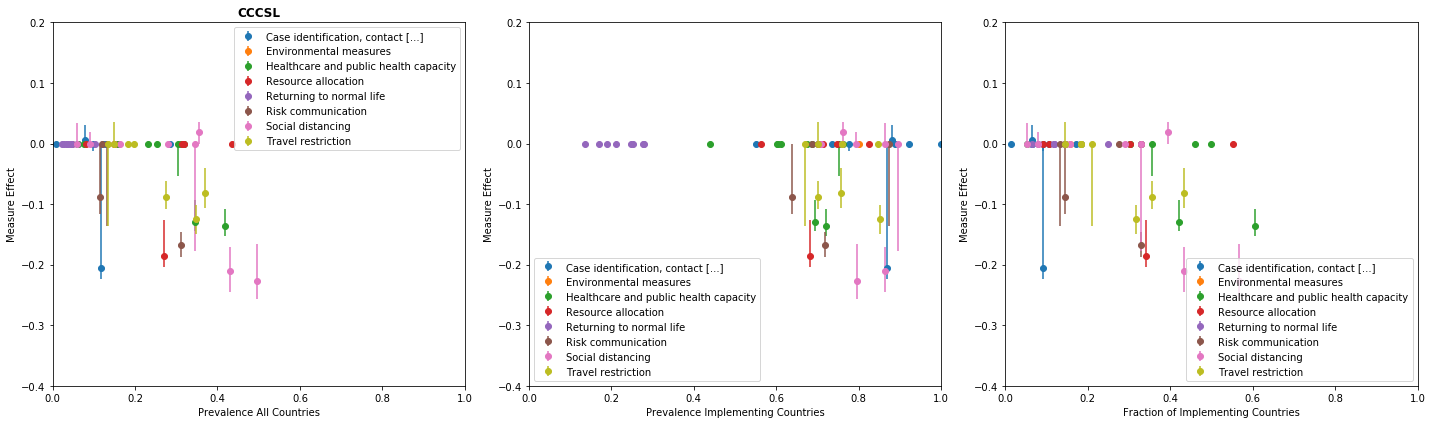

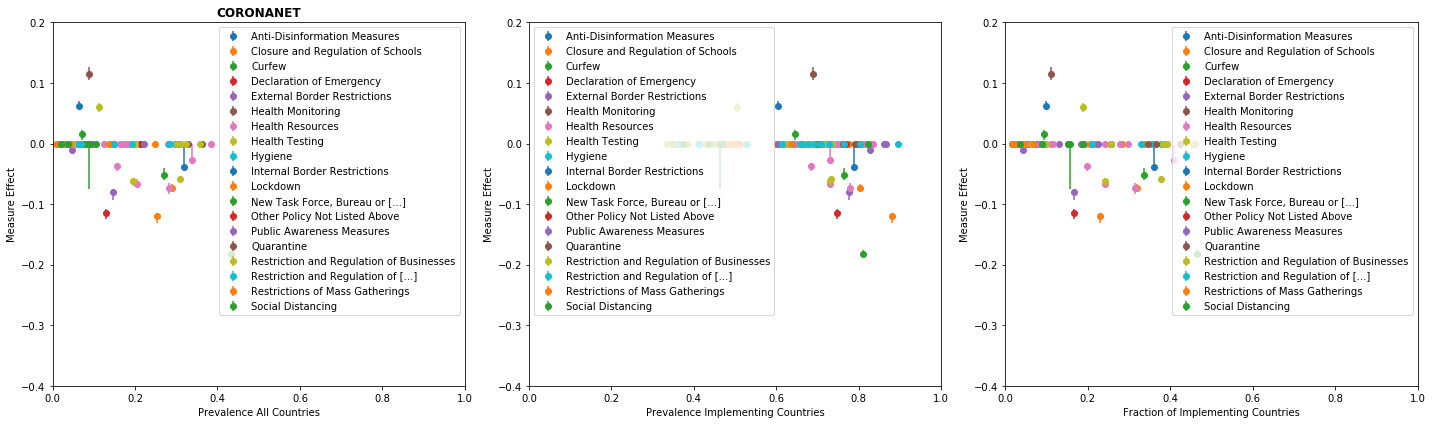

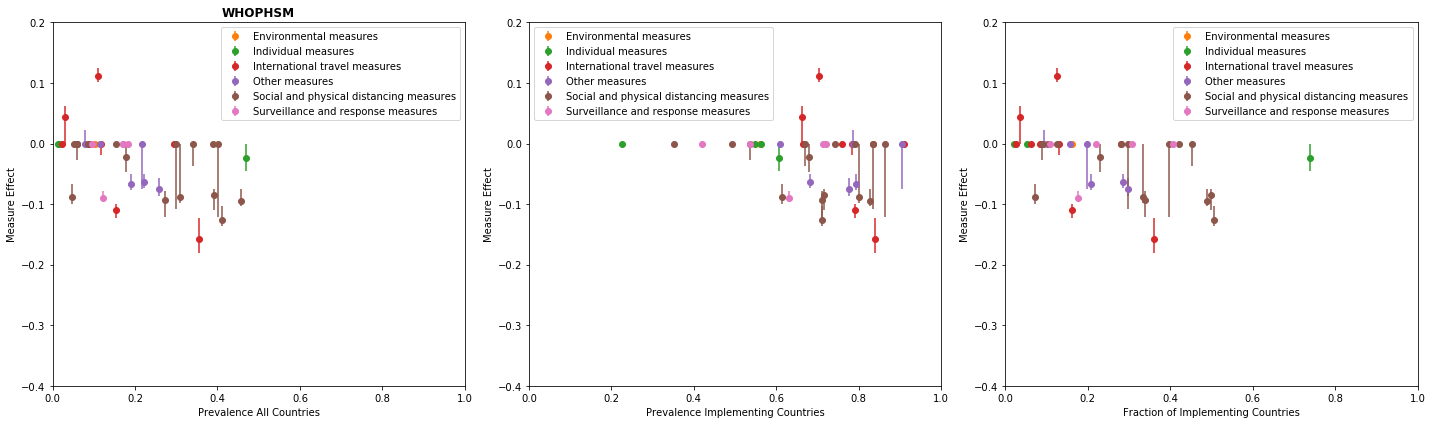

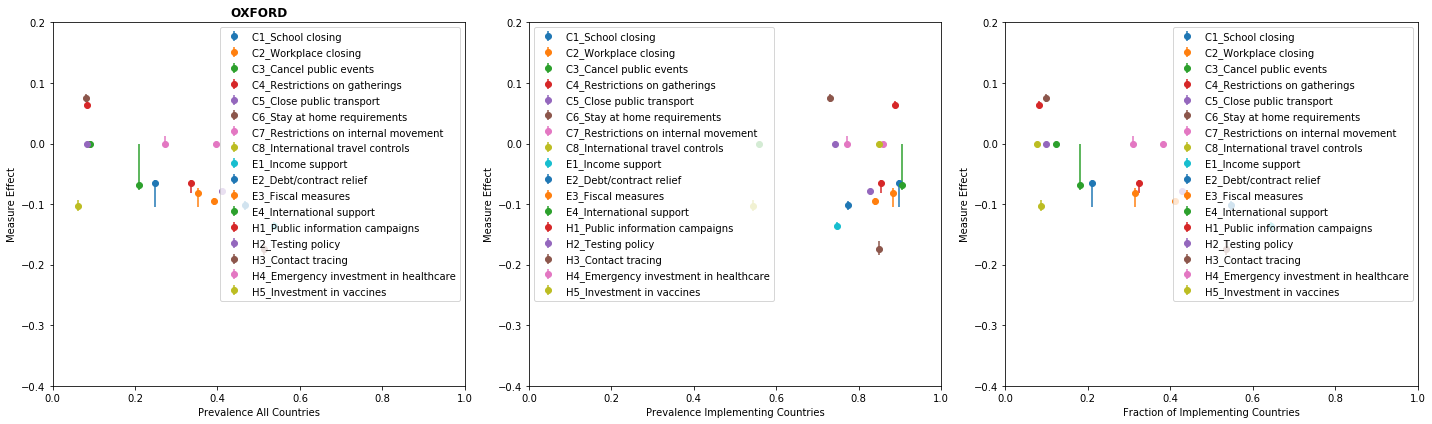

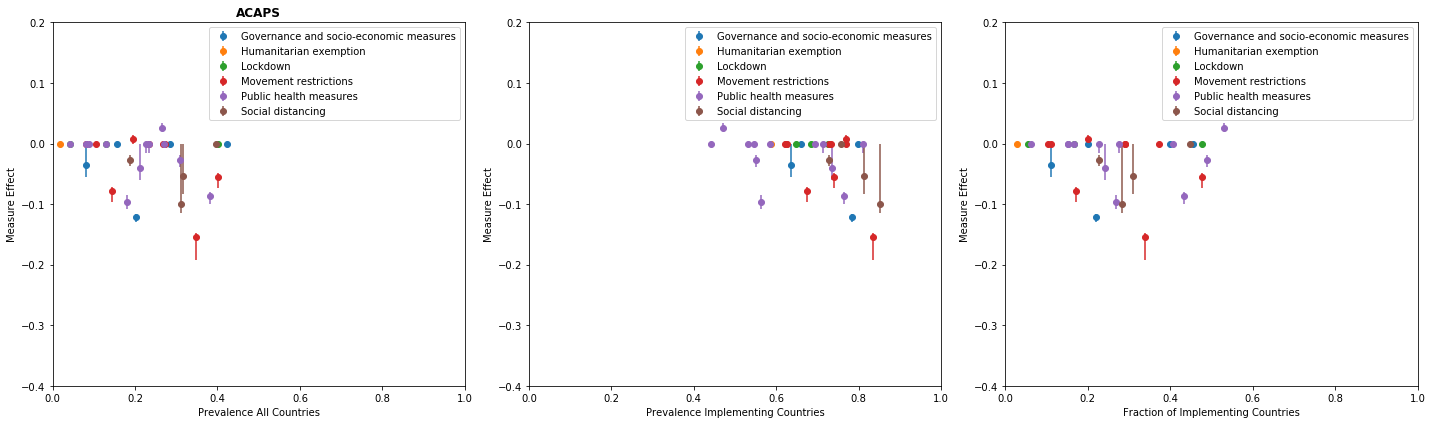

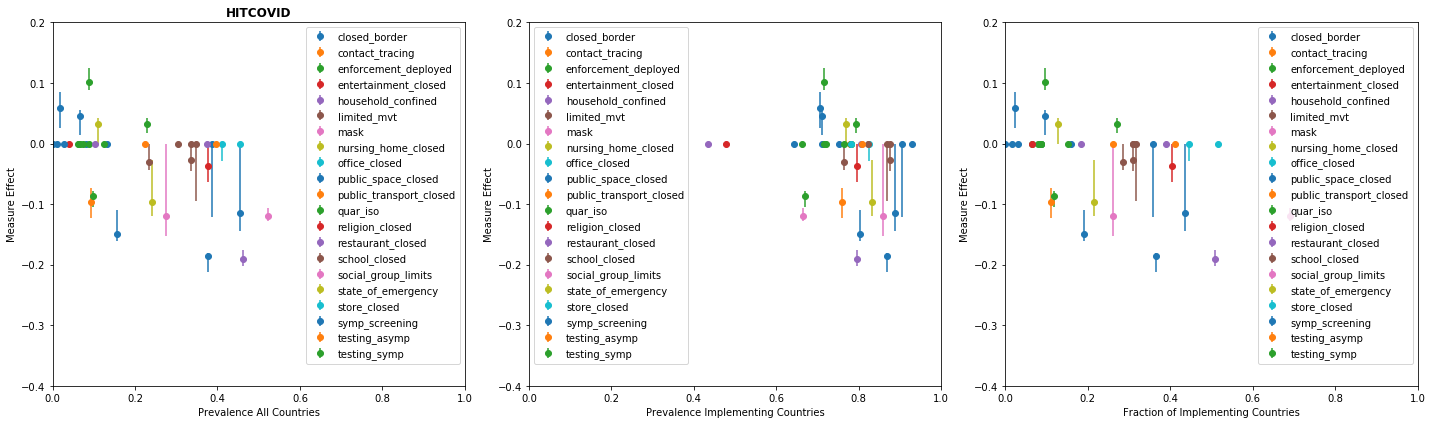

In [6]:
cv_cccsl.PlotPrevalenceEffects    (title = 'CCCSL',     ylim = (-.4,.2), filename = 'prevalenceeffects_cccsl_200907.pdf')
cv_coronanet.PlotPrevalenceEffects(title = 'CORONANET', ylim = (-.4,.2), filename = 'prevalenceeffects_coronanet_200907.pdf')
cv_whophsm.PlotPrevalenceEffects  (title = 'WHOPHSM',   ylim = (-.4,.2), filename = 'prevalenceeffects_whophsm_200907.pdf')

cv_oxford.PlotPrevalenceEffects   (title = 'OXFORD',    ylim = (-.4,.2), filename = 'prevalenceeffects_oxford_200907.pdf')
cv_acaps.PlotPrevalenceEffects    (title = 'ACAPS',     ylim = (-.4,.2), filename = 'prevalenceeffects_acaps_200907.pdf')
cv_hitcovid.PlotPrevalenceEffects (title = 'HITCOVID',  ylim = (-.4,.2), filename = 'prevalenceeffects_hitcovid_200007.pdf')


In [ ]:
prev_cccsl = cv_cccsl.EstimateMeasurePrevalence(shiftdays=10)
prev_cccsl[~prev_cccsl['Measure_L1'].eq('Returning to normal life')].reset_index().sort_values('index')[['Prevalence All Countries','Prevalence Implementing Countries','Fraction of Implementating Countries']].style.hide_index()

prev_whophsm = cv_whophsm.EstimateMeasurePrevalence(shiftdays=10)
prev_whophsm.reset_index().sort_values('index')[['Prevalence All Countries','Prevalence Implementing Countries','Fraction of Implementating Countries']].style.hide_index()


In [ ]:
pickle.dump(cv_cccsl,open('pickle/cv_cccsl_200831_inclFinal.pickle','wb'))
pickle.dump(cv_oxford,open('pickle/cv_oxford_200831_inclFinal.pickle','wb'))
pickle.dump(cv_whophsm,open('pickle/cv_whophsm_200831_inclFinal.pickle','wb'))
pickle.dump(cv_acaps,open('pickle/cv_acaps_200831_inclFinal.pickle','wb'))
pickle.dump(cv_coronanet,open('pickle/cv_coronanet_200831_inclFinal.pickle','wb'))
pickle.dump(cv_hitcovid,open('pickle/cv_hitcovid_200831_inclFinal.pickle','wb'))

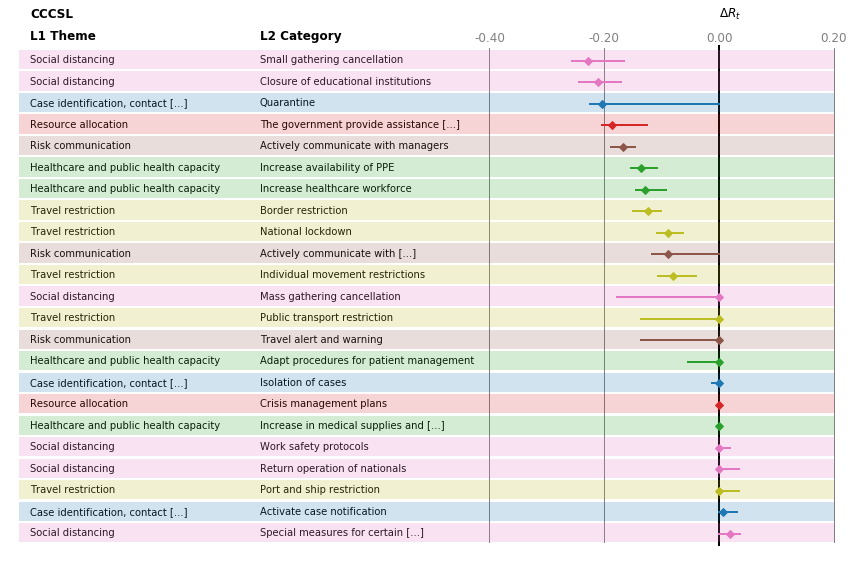

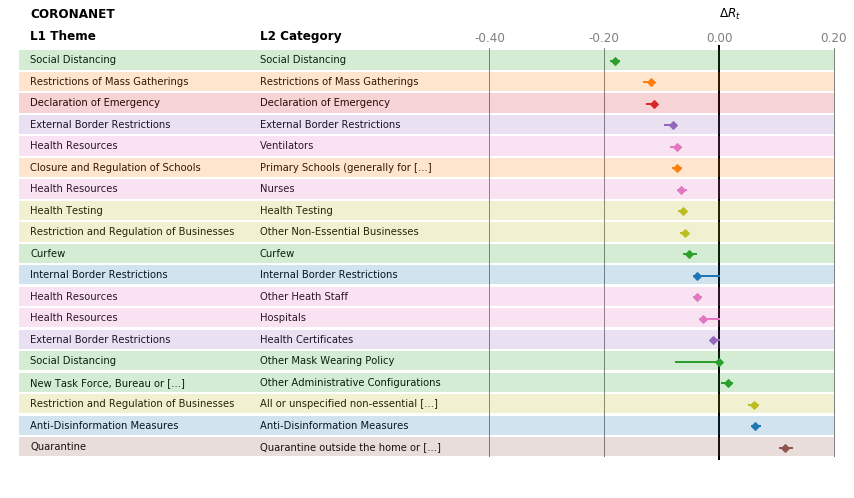

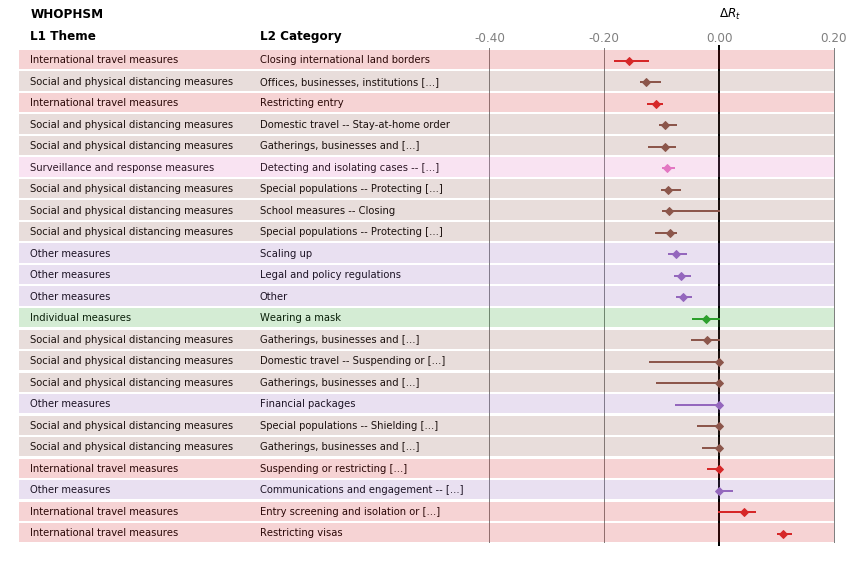

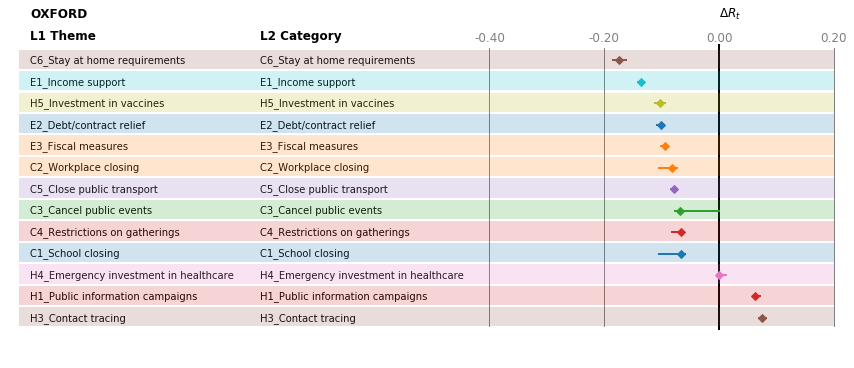

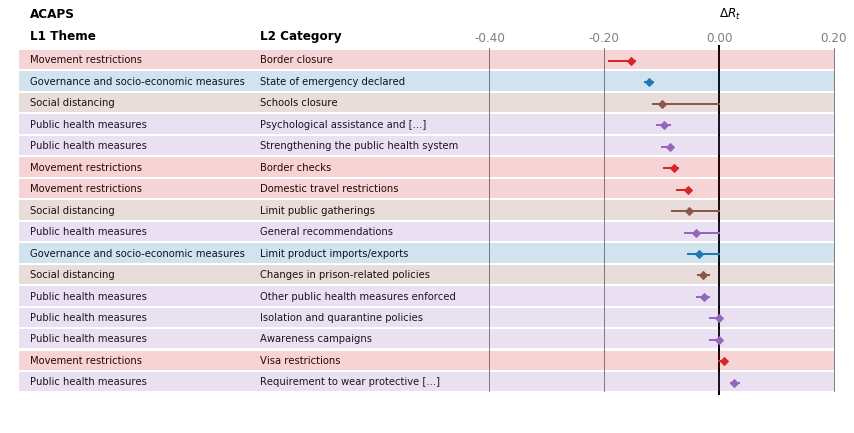

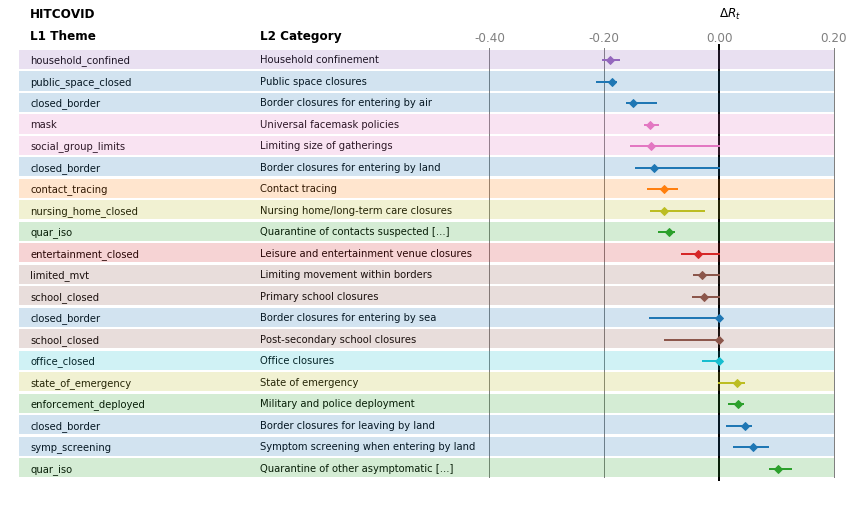

In [8]:
cv_cccsl.PlotMeasureListSorted    (title = 'CCCSL',     drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_cccsl_200907_noCE.pdf',     graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_coronanet.PlotMeasureListSorted(title = 'CORONANET', drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_coronanet_200907_noCE.pdf', graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_whophsm.PlotMeasureListSorted  (title = 'WHOPHSM',   drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_whophsm_200907_noCE.pdf',   graylines = [-40,-20,20], include_countries = False, figsize = (12,3))

cv_oxford.PlotMeasureListSorted   (title = 'OXFORD',    drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_oxford_200907_noCE.pdf',    graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_acaps.PlotMeasureListSorted    (title = 'ACAPS',     drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_acaps_200907_noCE.pdf',     graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_hitcovid.PlotMeasureListSorted (title = 'HITCOVID',  drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_hitcovid_200907_noCE.pdf',  graylines = [-40,-20,20], include_countries = False, figsize = (12,3))


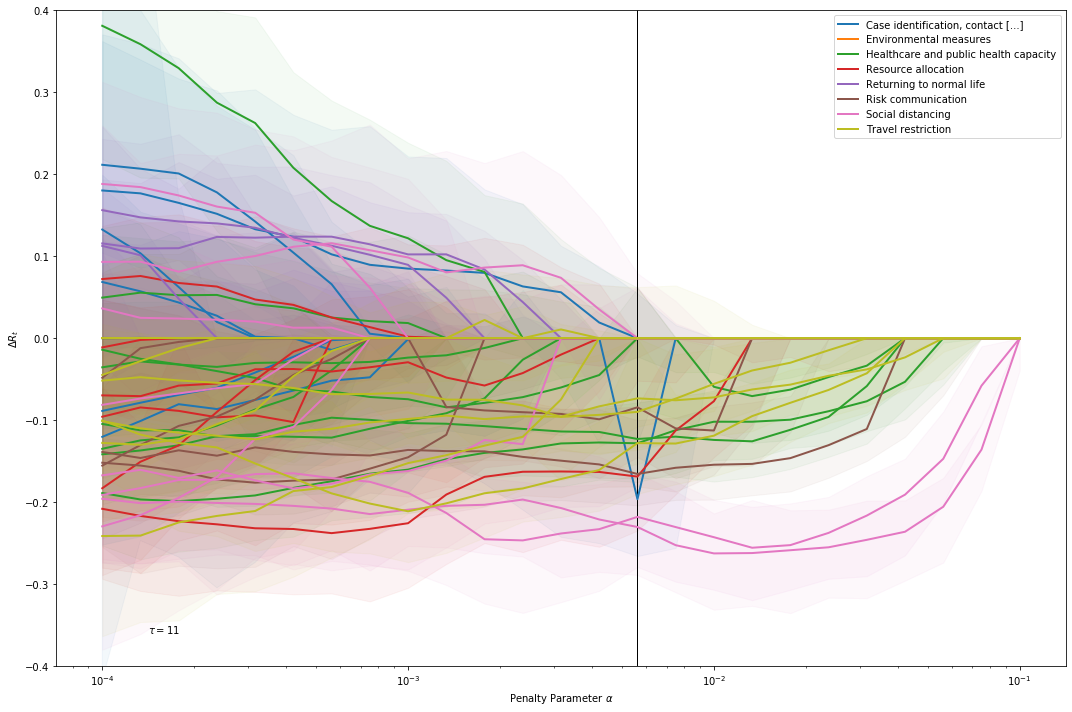

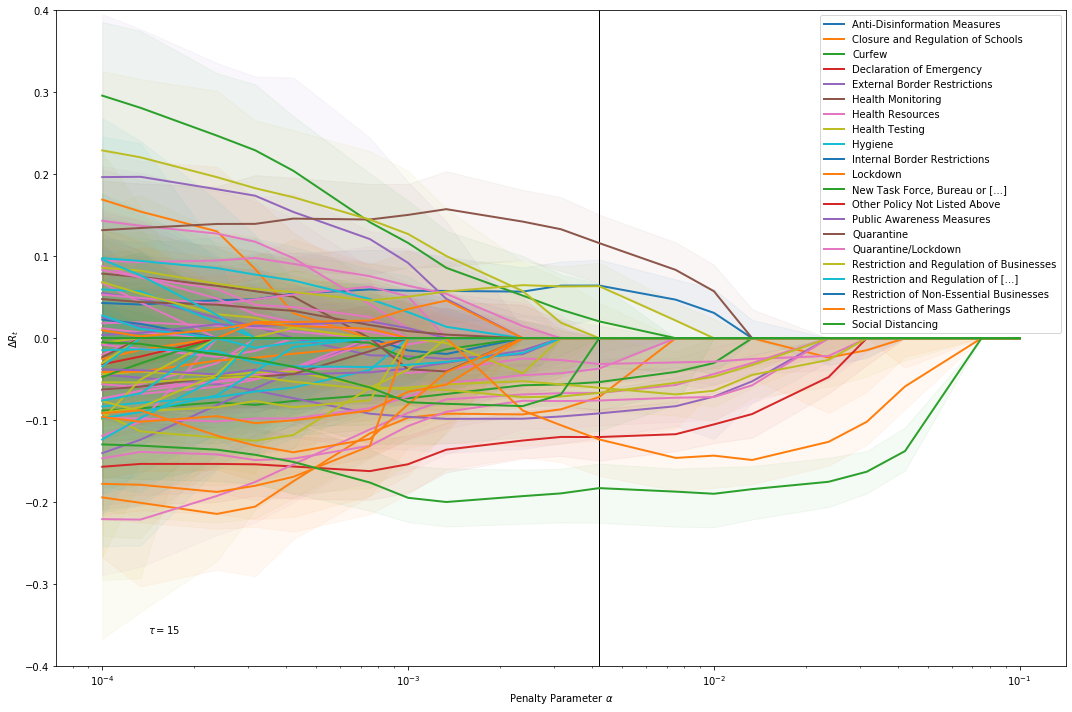

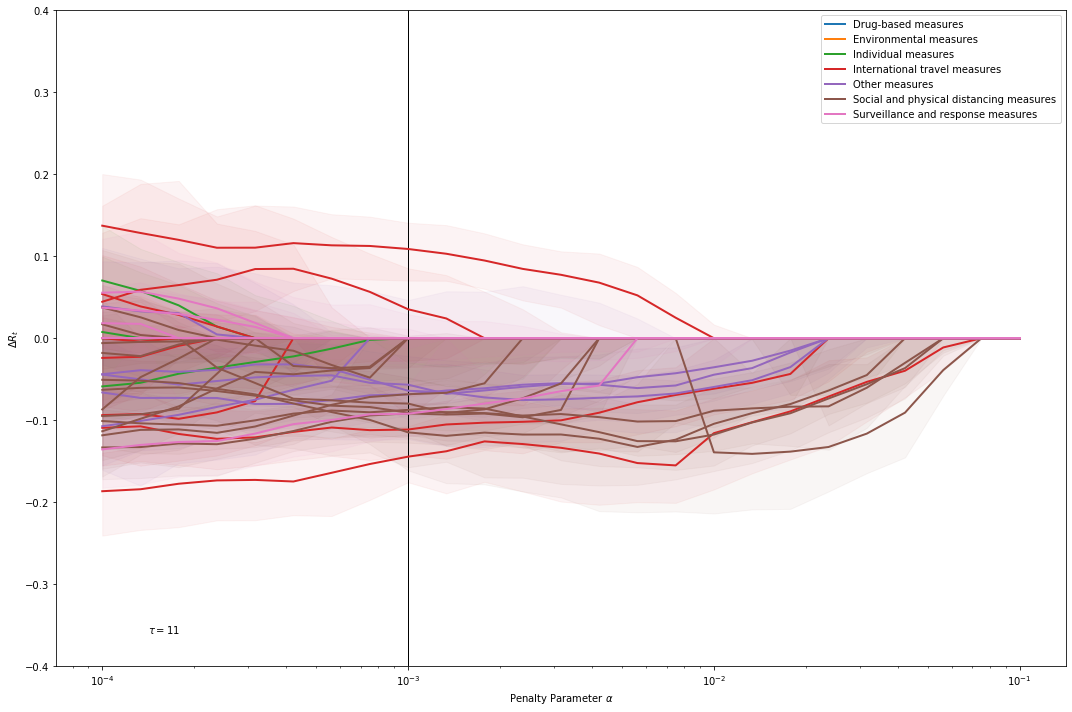

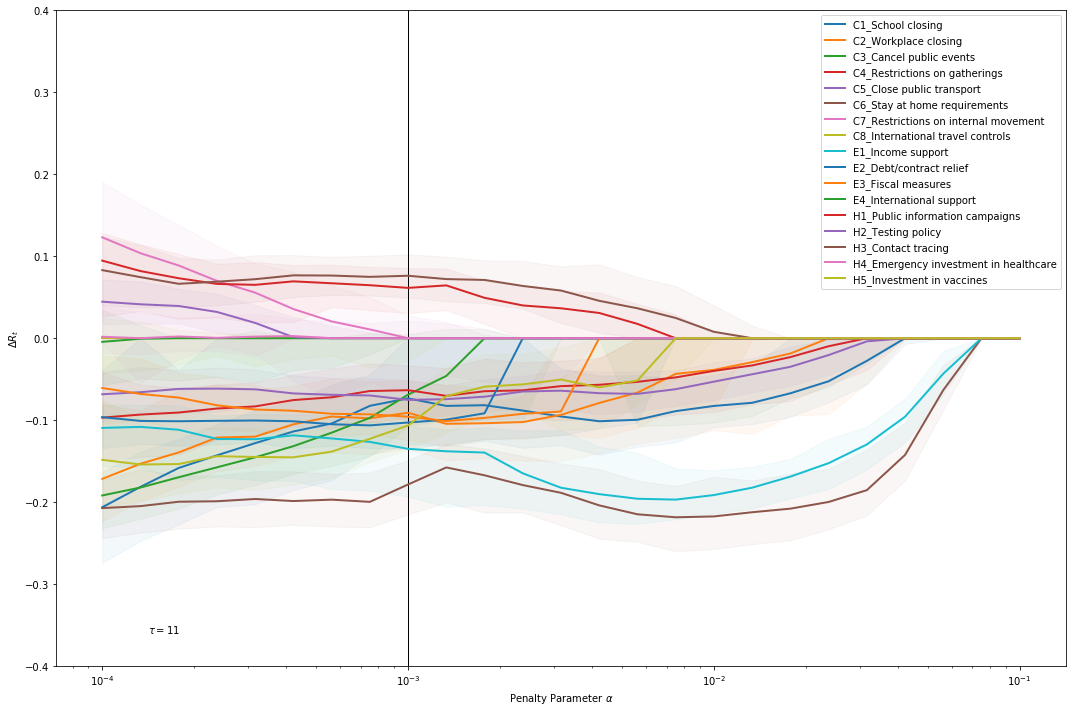

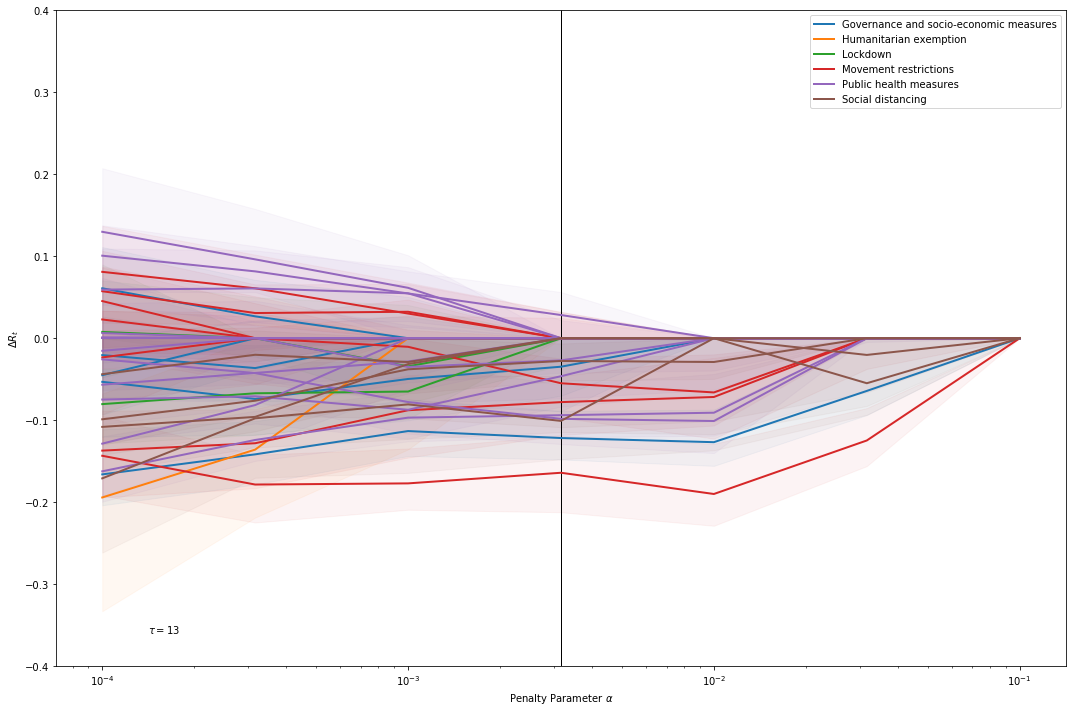

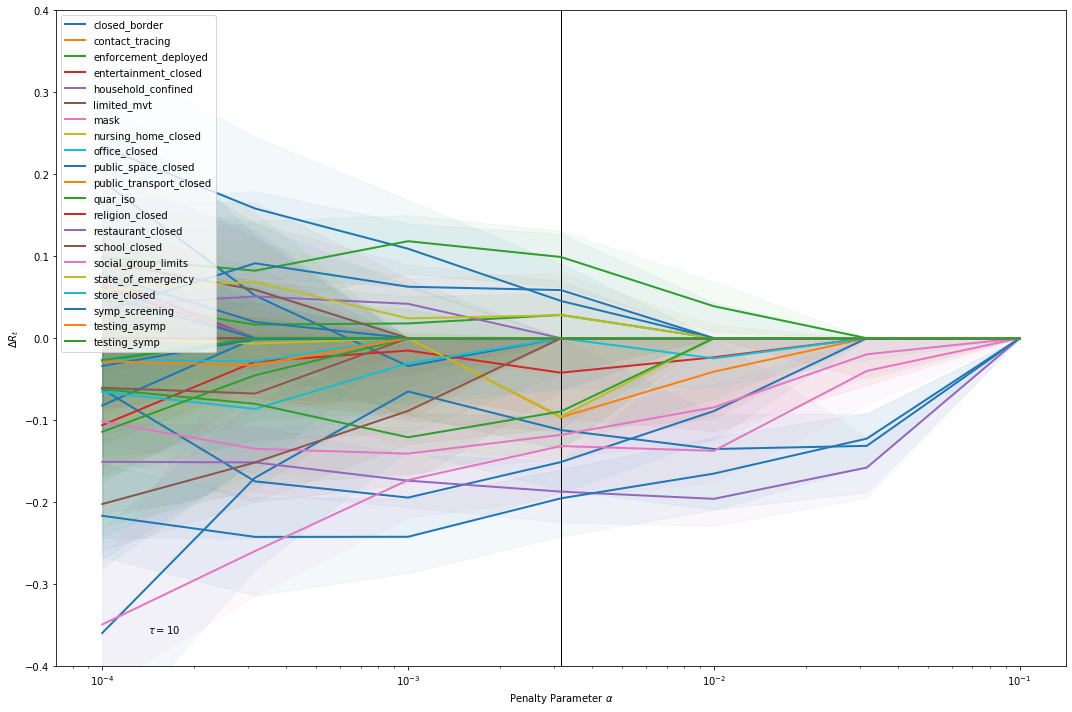

In [9]:
cv_cccsl.PlotCVAlphaSweep    (shiftdays=11, highlight_alpha=0.005623, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_cccsl_200831.pdf')
cv_coronanet.PlotCVAlphaSweep(shiftdays=15, highlight_alpha=0.004217, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_coronanet_200831.pdf')
cv_whophsm.PlotCVAlphaSweep  (shiftdays=11, highlight_alpha=0.001000, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_whophsm_200831.pdf')

cv_oxford.PlotCVAlphaSweep   (shiftdays=11, highlight_alpha=0.001000, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_oxford_200831.pdf')
cv_acaps.PlotCVAlphaSweep    (shiftdays=13, highlight_alpha=0.003162, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_acaps_200831.pdf')
cv_hitcovid.PlotCVAlphaSweep (shiftdays=10, highlight_alpha=0.003162, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_hitcovid_200831.pdf')


In [ ]:
cv_cccsl = pickle.load(open('pickle/cv_cccsl_200817.pickle','rb'))
cv_oxford = pickle.load(open('pickle/cv_oxford_200817.pickle','rb'))
cv_whophsm = pickle.load(open('pickle/cv_whophsm_200817.pickle','rb'))
cv_acaps = pickle.load(open('pickle/cv_acaps_200817.pickle','rb'))
cv_coronanet = pickle.load(open('pickle/cv_coronanet_200817.pickle','rb'))
cv_hitcovid = pickle.load(open('pickle/cv_hitcovid_200817.pickle','rb'))


In [ ]:
# additional statistical tests

cv_cccsl_removeAmer = cvc.CrossValidation(**default_params, RemoveContinent = 'Americas')
cv_cccsl_removeAsia = cvc.CrossValidation(**default_params, RemoveContinent = 'Asia')
cv_cccsl_removeEuro = cvc.CrossValidation(**default_params, RemoveContinent = 'Europe')


In [ ]:
cv_cccsl_removeAmer.ComputeFinalModels(modelparameters=[(11,0.005623)])
cv_cccsl_removeAsia.ComputeFinalModels(modelparameters=[(11,0.005623)])
cv_cccsl_removeEuro.ComputeFinalModels(modelparameters=[(11,0.005623)])


In [ ]:
cv_cccsl_removeAmer.PlotMeasureListSorted(drop_zeros=True, entryheight=.35, rescale = False, title = 'Remove Americas', graylines = [-40,-20,20], textbreak = 35, filename = 'measurelist_cccsl_200901_rAmer.pdf')
cv_cccsl_removeAsia.PlotMeasureListSorted(drop_zeros=True, entryheight=.35, rescale = False, title = 'Remove Asia',     graylines = [-40,-20,20], textbreak = 35, filename = 'measurelist_cccsl_200901_rAsia.pdf')
cv_cccsl_removeEuro.PlotMeasureListSorted(drop_zeros=True, entryheight=.35, rescale = False, title = 'Remove Europe',   graylines = [-40,-20,20], textbreak = 35, filename = 'measurelist_cccsl_200901_rEuro.pdf')


In [ ]:
cv_cccsl_removeAmer.FinalMeasureEffects(additional_columns=['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measurelist_200901_removeAmer.csv')
cv_cccsl_removeAsia.FinalMeasureEffects(additional_columns=['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measurelist_200901_removeAsia.csv')
cv_cccsl_removeEuro.FinalMeasureEffects(additional_columns=['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measurelist_200901_removeEuro.csv')

In [11]:
countrycount = np.array([len(cv_cccsl.RegressionDF(11)['Country'].unique()), len(cv_coronanet.RegressionDF(15)['Country'].unique()),len(cv_whophsm.RegressionDF(11)['Country'].unique())])

measurecount = np.array([len(cv_cccsl.RegressionDF(11).columns)-3,len(cv_coronanet.RegressionDF(15).columns)-3,len(cv_whophsm.RegressionDF(11).columns)-3])

print(countrycount)
print(measurecount)


print(countrycount + measurecount + 1)

[ 77 202 196]
[ 54 126  41]
[132 329 238]


In [12]:
np.array([79,218,224]) + np.array([46,107,40])+1

array([126, 326, 265])